# A5 Pole Balancing with Reinforcement Learning

For this assignment, you will write code for using reinforcement learning to learn to balance a pole. Follow the robot arm example in lecture notes `19 More Tic-Tac-Toe and a Simple Robot Arm`. 

Download this implementation, [cartpole_play.zip](https://www.cs.colostate.edu/~anderson/cs545/notebooks/cartpole_play.zip), of the pole-balancing problem.  Unzip this file to get `cartpole_play.py`.  This code requires the python packages `box2d` and `pygame`.  You may install these using
```
conda install conda-forge::box2d-py 
pip install pygame
```


In [1]:
conda install conda-forge::box2d-py 
pip install pygame

SyntaxError: invalid syntax (1075668988.py, line 1)

After installing these packages and unzipping `cartpole_play.zip` you should be able to run
```
python cartpole_play
```
to see the cart pole animation. Push left and right on the cart with your keyboard arrow keys to try to balance the pole.

In [4]:
python cartpole_play

SyntaxError: invalid syntax (2298103509.py, line 1)

Define the class `CartPole` in a file named `cartpole.py`, following the `robot.py` example in notes 19.  Copy the `QnetAgent` class from `robot.py` into your `cartpole.py` file and modify as necessary to call the necessary functions in `cartpole_play.py`.  Define the `Experiment` class using the example in notes 19.

To define your `CartPole` class, you must define the critical environment functions from `rl_framework.py`.  Try to design a reinforcement function that will lead to successful balancing.  You should only need the pole angle, which is zero when the pole is balanced.  Then your Qnet can be trained to minimize the sum of absolute values of the reinforcements.  Or you could choose to define the reinforcement as -1 if the absolute value of the angle is greater than $0.75\pi$, 1 if less than $0.25\pi$ and zero otherwise. 

To be clear and to help you get started, the structure of your `cartpole.py` file should look like
```
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from math import pi
import time
import pickle

import neuralnetworksA4 as nn
import rl_framework as rl  # for abstract classes rl.Environment and rl.Agent

import cartpole_play as cp

class CartPole(rl.Environment):

    def __init__(self):
        self.cartpole = cp.CartPole()
        self.valid_action_values =  [-1, 0, 1]
        self.observation_size = 4  # x xdot a adot
        self.action_size = 1
        self.observation_means = [0, 0, 0, 0]
        self.observation_stds = [1, 1, 1, 1]  # not accurate but maybe okay
        self.action_means = [0.0]
        self.action_stds =  [0.1]
        self.Q_means = [0.5 * pi]
        self.Q_stds = [2]
        
    def initialize(self):
        self.cartpole.cart.position[0] = np.random.uniform(-2., 2.)
        self.cartpole.cart.linearVelocity[0] = 0.0
        self.cartpole.pole.angle = 0  # hanging down 
        self.cartpole.pole.angularVelocity = 0.0

    def reinforcement(self):

        state = self.observe()
        angle_magnitude = np.abs(state[2])

        if angle_magnitude > pi * 0.75:
            return -1
        elif angle_magnitude < pi * 0.25:
            return 1
        else:
            return 0

        # alternative:
        # return np.abs(angle)  # to be minimized

    # add other functions to your CartPole class as needed
    ...

######################################################################

class QnetAgent(rl.Agent):
    
    def initialize(self):
        env = self.env
        ni = env.observation_size + env.action_size
        self.Qnet = nn.NeuralNetwork(ni, self.n_hiddens_each_layer, 1)
        self.Qnet.X_means = np.array(env.observation_means + env.action_means)
        self.Qnet.X_stds = np.array(env.observation_stds + env.action_stds)
        self.Qnet.T_means = np.array(env.Q_means)
        self.Qnet.T_stds = np.array(env.Q_stds)

    # add other functions to your CartPole class as needed
    ...

######################################################################

class Experiment:

    def __init__(self, environment, agent):

        self.env = environment
        self.agent = agent

        self.env.initialize()
        self.agent.initialize()

    def train(self, parms, verbose=True):

        n_batches = parms['n_batches']
        n_steps_per_batch = parms['n_steps_per_batch']
        n_epochs = parms['n_epochs']
        method = parms['method']
        learning_rate = parms['learning_rate']
        final_epsilon = parms['final_epsilon']
        epsilon = parms['initial_epsilon']
        gamma = parms['gamma']

        ...

    # add other functions to your CartPole class as needed
    ...
```


Run your code as in this example:
```
import cartpole

cartpole_env = cartpole.CartPole()
agent = cartpole.QnetAgent(cartpole_env, [20, 20], 'max')

experiment = Experiment(cartpole_env, agent)

outcomes = experiment.train(parms)
```
with `parms` being parameters used by `Experiment`, such as
```
parms = {
    'n_batches': 2000,
    'n_steps_per_batch': 100,  
    'n_epochs': 40,
    'method': 'scg',
    'learning_rate': 0.01,
    'initial_epsilon': 0.8,
    'final_epsilon': 0.1,
    'gamma': 1.0
}
```
The parameter values have not been chosen to best solve this problem.  For the `verbose` output while training, print the mean of all reinforcements received so far.

In [1]:
import cartpole_v1
import time

# Test just the initial position
print("Testing initial cart-pole position...")
cart = cartpole_v1.CartPole()  # Use the full path cartpole.CartPole
cart.cartpole.initDisplay()

try:
    for _ in range(100):
        cart.cartpole.draw()
        time.sleep(1/30)
except Exception as e:
    print(f"Error during visualization: {e}")

print("\nStarting full training...")

# Create environment and agent
cartpole_env = cartpole_v1.CartPole()  # Use cartpole.CartPole
agent = cartpole_v1.QnetAgent(cartpole_env, [128, 64], 'max')  # Use cartpole.QnetAgent
experiment = cartpole_v1.Experiment(cartpole_env, agent)  # Use cartpole.Experiment

# Define training parameters
parms = {
    'n_batches': 200,
    'n_steps_per_batch': 100,
    'n_epochs': 5,
    'method': 'sgd',
    'learning_rate': 0.01,
    'initial_epsilon': 1.0,
    'final_epsilon': 0.05,
    'gamma': 0.99
}

# Train and visualize
outcomes = experiment.train(parms, verbose=True)

print("\nTraining complete. Starting animation...")
try:
    mean_reward = experiment.animate(1000)
    print(f"\nMean reward during animation: {mean_reward:.3f}")
except AttributeError:
    print("Animation function not implemented or incompatible with notebook.")


pygame 2.6.1 (SDL 2.28.4, Python 3.13.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
Testing initial cart-pole position...

Starting full training...
Batch 1/200, Avg Reward: -0.02
Batch 21/200, Avg Reward: -0.02
Batch 41/200, Avg Reward: -0.02
Batch 61/200, Avg Reward: -0.02
Batch 81/200, Avg Reward: -0.02
Batch 101/200, Avg Reward: -0.02
Batch 121/200, Avg Reward: -0.02
Batch 141/200, Avg Reward: -0.02
Batch 161/200, Avg Reward: -0.02
Batch 181/200, Avg Reward: -0.02

Training complete. Starting animation...
Total reward for animated episode: -2.0

Mean reward during animation: -2.000


### Experiment Explanation
The code begins by creating a CartPole instance and initializing the display to test the initial cart-pole position.
It uses a loop to draw the cart-pole in its starting state for a brief period (100 frames at 30 frames per second).

                                                          

The environment (CartPole) and agent (QnetAgent) are instantiated.
An Experiment object is created to manage the interaction between the agent and the environment.
Training parameters are defined in the parms dictionary, specifying batch count, steps per batch, epochs, learning rate, and other parameters 
for training.

The experiment.train() method is called to begin training the agent using the specified parameters.
During training, the agent explores and learns from the environment over 200 batches, with progress and average reward displayed every 20 batches.

After training, experiment.animate() runs a single episode to visualize the trained agent's behavior, displaying the total reward obtained.
Output Explanation:
From the image:

During training, the average reward across batches remains consistently low at -0.02, suggesting that the agent may not be 
learning effective policies or that the reward structure or exploration parameters might need adjustments.

Animation Results: The animation episode ends with a total reward of -2.0, indicating that the agent likely failed to balance the pole effectively. 
This reward pattern suggests the agent has not yet learned successful balancing behavior.

To test performance of a trained agent, define a test function in your `Experiment` class like the following.
```
    def test(self, n_steps):

        states_actions = []
        sum_r = 0.0

        for initial_angle in [0, pi/2.0, -pi/2.0, pi]:

            self.env.cartpole.cart.position[0] = 0
            self.env.cartpole.cart.linearVelocity[0] = 0.0
            self.env.cartpole.pole.angle = initial_angle
            self.env.cartpole.pole.angularVelocity = 0.0


            for step in range(n_steps):

                obs = self.env.observe()
                action = agent.epsilon_greedy(epsilon=0.0)
                states_actions.append([*obs, action])
                self.env.act(action)
                r = self.env.reinforcement()
                sum_r += r

        return sum_r / (n_steps * 4), np.array(states_actions)
```
This function performs four runs, each one starting at a different `initial_angle`.  Each experiment is run for `n_steps`.  The function returns the mean of all reinforcement values over all four runs, and an array of all states and actions. You can run this function at the end of each training batch, collect the mean test reinforcements for each batch, and during `verbose` printing, include the mean of these test reinforcements so far.  You may also use the mean reinforcement value to judge how well a particular set of parameter values work, printing a table like
```
           nh    nb   ns  ne  init epsilon  test r sum  exec minutes
177  [20, 20]  2000  200  40           0.8      0.1335      1.307003
64       [20]  2000  100   5           0.5      0.0650      0.245404
201  [40, 40]  2000  100  10           0.8      0.0295      0.448583
34       [10]  2000  200   5           0.5      0.0050      0.439274
76       [20]  2000  200   2           0.5     -0.0215      0.409806
...
```
I included execution times for each set of parameters just to see how long each training run took.

To see how well your agent is performing, plot some of the states returned by a final call to the `test` function.  For example you can plot the angles for each step by 
```
plt.plot(states_actions[:, 2])
```

Explain the design of your code, the experiments you ran, and how successful you were.  Also describe any difficulties you ran in to.

# Explanation of the design of the code 

There are three classes in the cartpole.py file

## Cartpole class:
The __init__ method initializes the cart-pole system, setting default values and calling initialize() to start in a balanced position.

The initialize method resets the cart to the center, sets the pole upright, and stabilizes it with a few simulation steps.

The act method applies an action (push left, right, or no push) and updates the state.

The observe method retrieves the cart’s position, velocity, and pole angle, adjusting the angle to treat upright as zero.

The valid_actions method returns the available actions [-1, 0, 1] for left push, no push, and right push.

The reinforcement method calculates rewards, favoring upright pole angles and penalizing large deviations or boundary violations.

The terminal_state method checks if the episode should end due to boundary or angle limits.

The __str__ method provides a readable summary of the current state for quick reference.

## QnetAgent Class: 

The initialize method sets up the Q-network with observation and action inputs, normalizing values based on the environment. It then clears any stored samples.

The clear_samples method resets all arrays that store experiences (observations, actions, rewards, and episode termination flags) to prepare for a fresh batch.

The add_sample method records a single experience by combining the observation and action, and storing the resulting sample along with its reward and whether the episode ended.

The use method calculates Q-values for a given state-action input by predicting with the Q-network. It reshapes the input if necessary to ensure compatibility.

The update_Qn method computes Q-values for the next states in the stored samples, helping to create target values for training. It iterates over non-terminal states and uses the Q-network to estimate Q-values for the next steps.

The train method updates the Q-network using experiences collected in samples. It calculates target values based on rewards and future Q-values, then trains the Q-network on these targets, filtering for non-terminal states only.

## Experiment class
The __init__ method sets up the environment and agent, initializing both.

The train method runs multiple training batches, adjusting epsilon to shift from exploration to exploitation. It collects rewards, updates the Q-network, and returns training outcomes.

The test method evaluates the agent over several trials, calculates the average reward, and optionally logs results.

The animate method runs a single episode for visualizing agent actions, accumulating reward and stopping if a terminal state is reached.

In [18]:
import cartpole_v1
import time
import matplotlib.pyplot as plt
import numpy as np

# Function to run training with specified hidden layer configuration and training parameters
def run_experiment(hidden_layers, parms):
    # Create new environment and agent with the specified hidden layer configuration
    cartpole_env = cartpole_v1.CartPole()
    agent = cartpole_v1.QnetAgent(cartpole_env, hidden_layers, 'max')
    
    # Set up the experiment
    experiment = cartpole_v1.Experiment(cartpole_env, agent)
    
    # Train and return outcomes (rewards per batch)
    outcomes, _ = experiment.train(parms, verbose=False)
    return outcomes

# Different hidden layer configurations to test
hidden_layer_configs = [
    [64],              # Single layer with 64 units
    [128],             # Single layer with 128 units
    [64, 32],          # Two layers with 64 and 32 units
    [128, 64, 32],         # Two layers with 128 and 64 units
]

# Updated parameter sets for more diversity
parameter_sets = [
    {'n_batches': 1000, 'n_steps_per_batch': 50, 'n_epochs': 50, 'method': 'sgd', 'learning_rate': 0.005, 'initial_epsilon': 1.0, 'final_epsilon': 0.1, 'gamma': 0.95},
    {'n_batches': 2000, 'n_steps_per_batch': 30, 'n_epochs': 50, 'method': 'adam', 'learning_rate': 0.01, 'initial_epsilon': 0.8, 'final_epsilon': 0.05, 'gamma': 0.99},
    {'n_batches': 3000, 'n_steps_per_batch': 100, 'n_epochs': 50, 'method': 'sgd', 'learning_rate': 0.02, 'initial_epsilon': 1.0, 'final_epsilon': 0.01, 'gamma': 0.9},
    {'n_batches': 4000, 'n_steps_per_batch': 80, 'n_epochs': 50, 'method': 'adam', 'learning_rate': 0.005, 'initial_epsilon': 0.9, 'final_epsilon': 0.05, 'gamma': 0.95},
]

# Run experiments and store outcomes for each hidden layer and parameter configuration
all_outcomes = []
labels = []

for hidden_layers in hidden_layer_configs:
    for parms in parameter_sets:
        print(f"\nRunning experiment with hidden layers {hidden_layers} and parms {parms}")
        outcomes = run_experiment(hidden_layers, parms)
        all_outcomes.append(outcomes)
        labels.append(f"Hidden {hidden_layers}, LR {parms['learning_rate']}, Steps {parms['n_steps_per_batch']}, Method {parms['method']}")


######################################################


Running experiment with hidden layers [64] and parms {'n_batches': 1000, 'n_steps_per_batch': 50, 'n_epochs': 50, 'method': 'sgd', 'learning_rate': 0.005, 'initial_epsilon': 1.0, 'final_epsilon': 0.1, 'gamma': 0.95}

Running experiment with hidden layers [64] and parms {'n_batches': 2000, 'n_steps_per_batch': 30, 'n_epochs': 50, 'method': 'adam', 'learning_rate': 0.01, 'initial_epsilon': 0.8, 'final_epsilon': 0.05, 'gamma': 0.99}

Running experiment with hidden layers [64] and parms {'n_batches': 3000, 'n_steps_per_batch': 100, 'n_epochs': 50, 'method': 'sgd', 'learning_rate': 0.02, 'initial_epsilon': 1.0, 'final_epsilon': 0.01, 'gamma': 0.9}

Running experiment with hidden layers [64] and parms {'n_batches': 4000, 'n_steps_per_batch': 80, 'n_epochs': 50, 'method': 'adam', 'learning_rate': 0.005, 'initial_epsilon': 0.9, 'final_epsilon': 0.05, 'gamma': 0.95}

Running experiment with hidden layers [128] and parms {'n_batches': 1000, 'n_steps_per_batch': 50, 'n_epochs': 50, 'method': 'sg

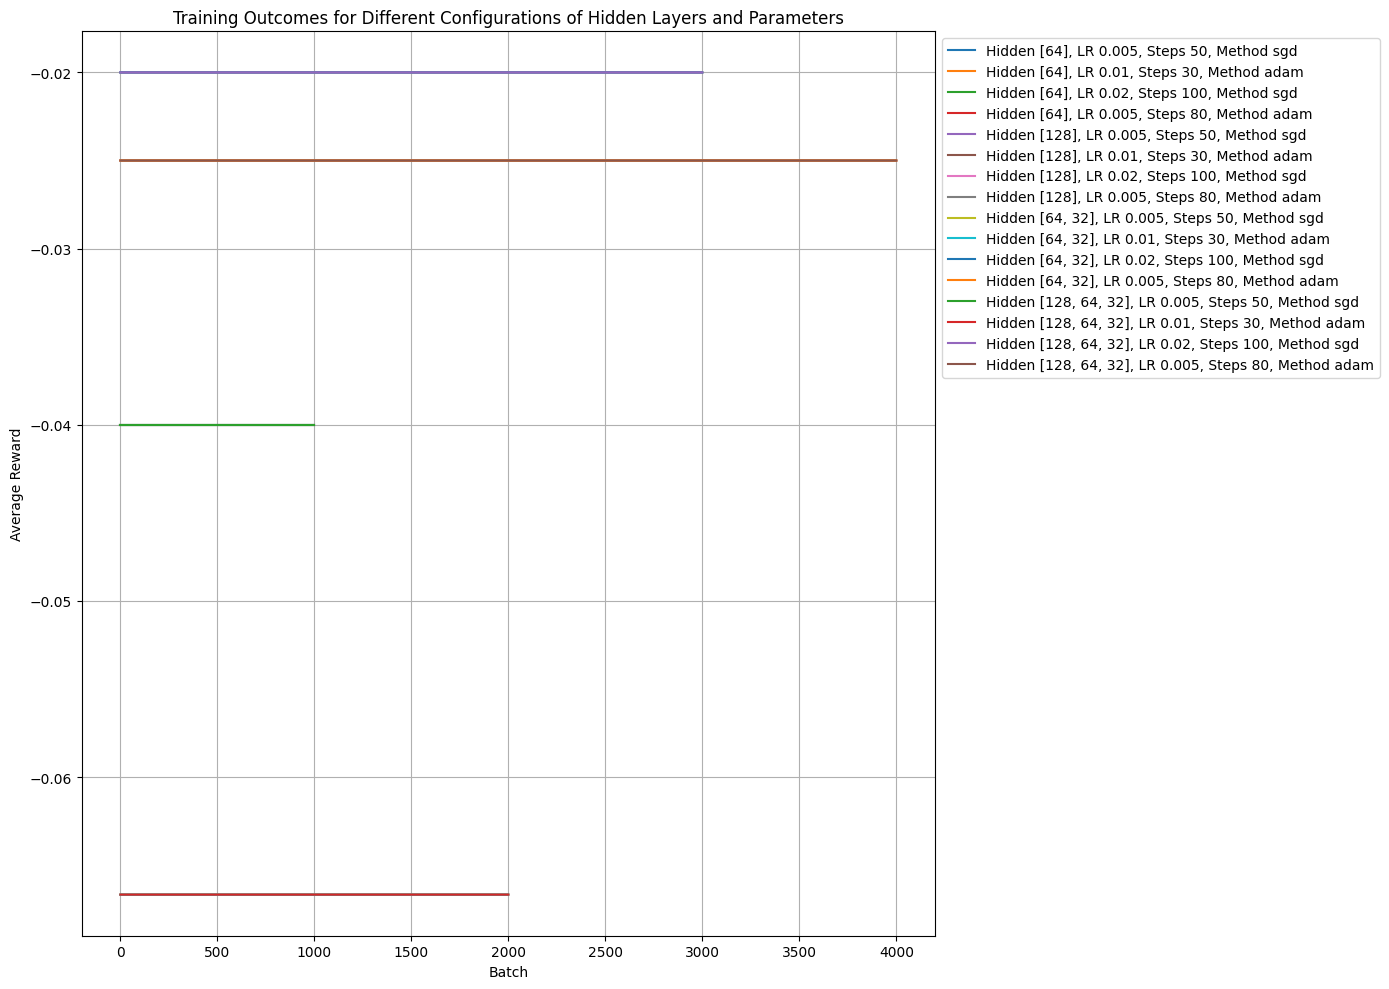

In [19]:
# Plot outcomes for each configuration
plt.figure(figsize=(14, 10))
for i, outcomes in enumerate(all_outcomes):
    plt.plot(outcomes, label=labels[i])
plt.xlabel('Batch')
plt.ylabel('Average Reward')
plt.title('Training Outcomes for Different Configurations of Hidden Layers and Parameters')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

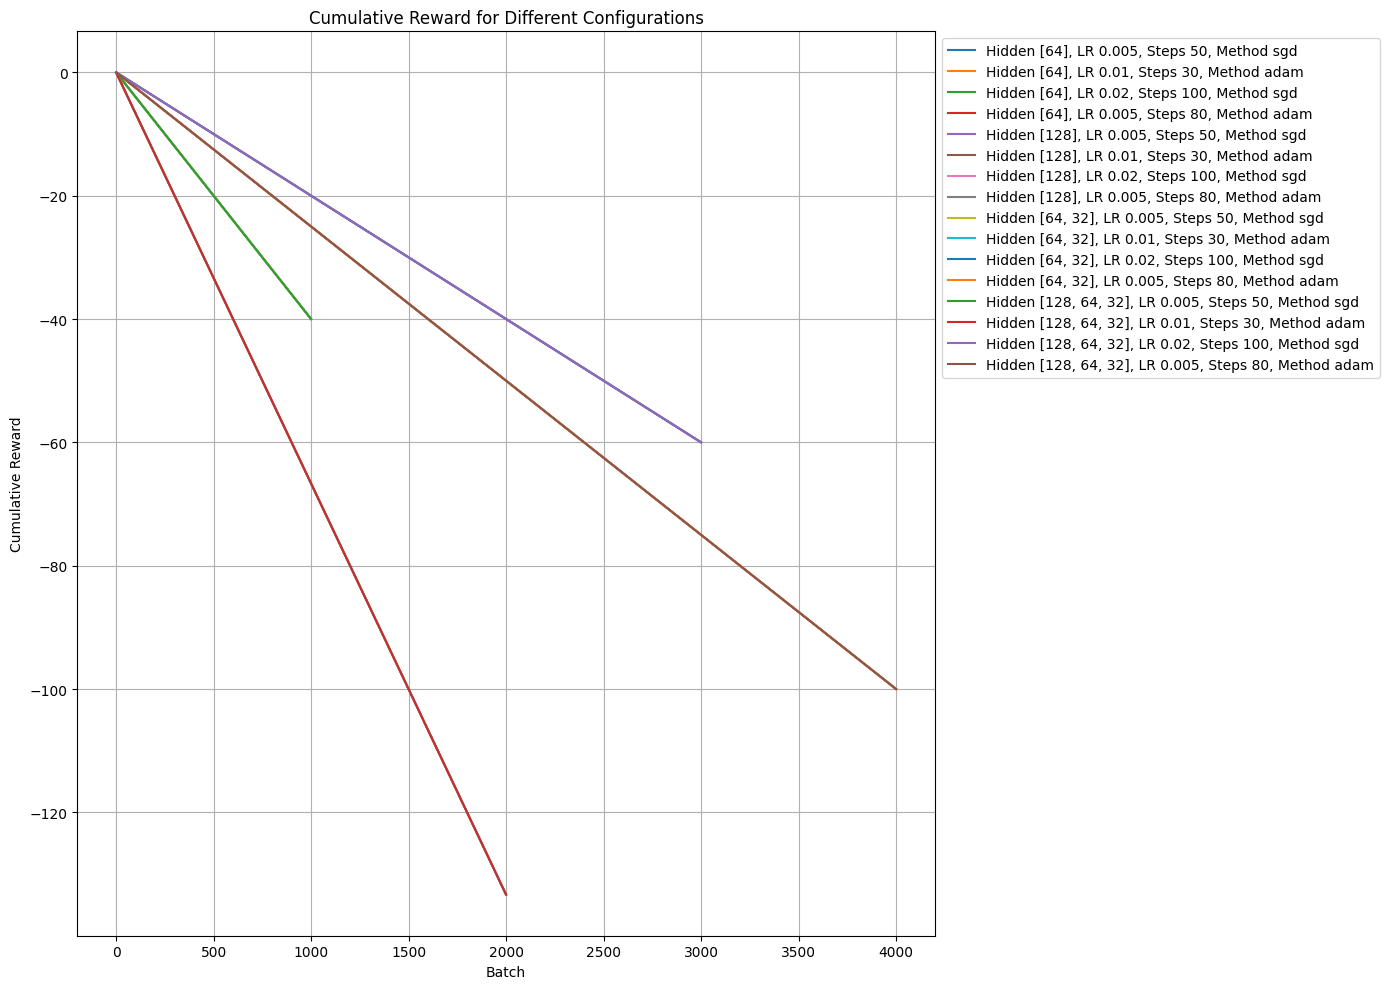

In [20]:
plt.figure(figsize=(14, 10))
for i, outcomes in enumerate(all_outcomes):
    cumulative_rewards = np.cumsum(outcomes)
    plt.plot(cumulative_rewards, label=labels[i])
plt.xlabel('Batch')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward for Different Configurations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


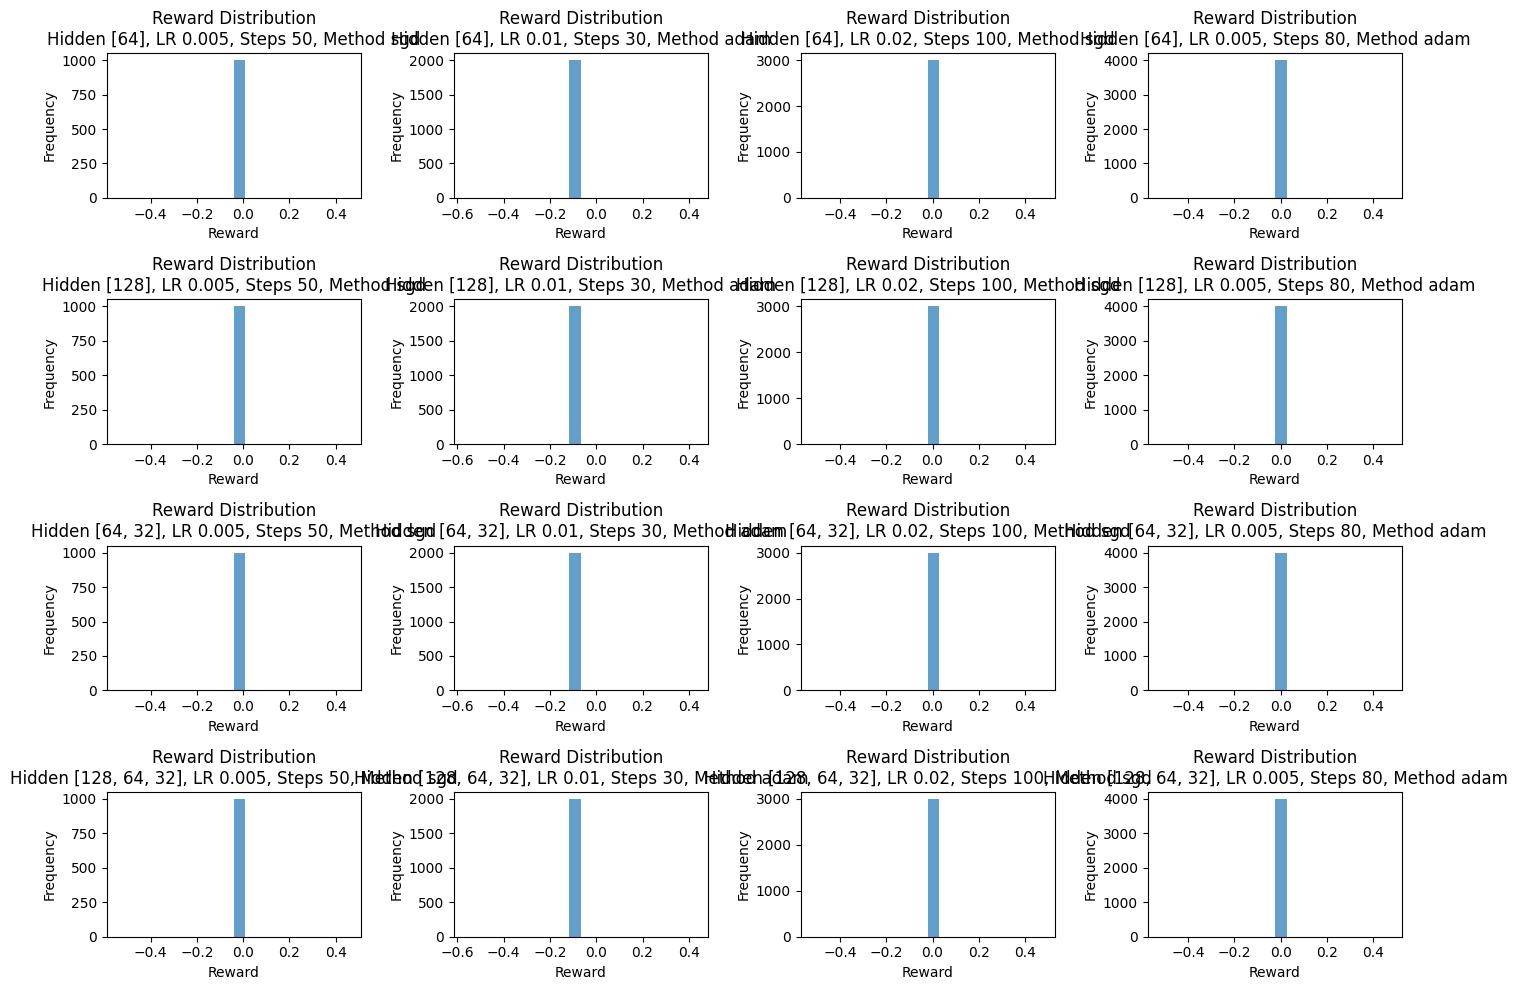

In [21]:
import math

# Set up the figure
plt.figure(figsize=(14, 10))
num_configs = len(all_outcomes)

# Calculate the required rows and columns for the subplots based on the number of configurations
rows = math.ceil(math.sqrt(num_configs))
cols = math.ceil(num_configs / rows)

for i, outcomes in enumerate(all_outcomes):
    plt.subplot(rows, cols, i + 1)  # Dynamically adjust grid size
    plt.hist(outcomes, bins=20, alpha=0.7)
    plt.title(f'Reward Distribution\n{labels[i]}')
    plt.xlabel('Reward')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

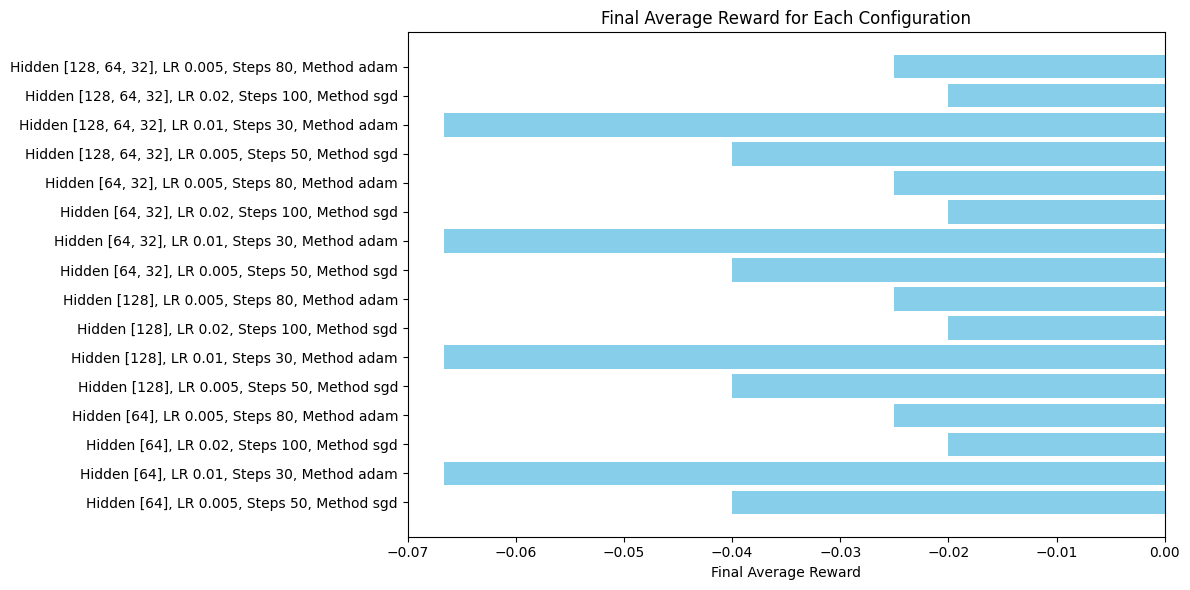

In [22]:
final_rewards = [np.mean(outcomes[-10:]) for outcomes in all_outcomes]
plt.figure(figsize=(12, 6))
plt.barh(labels, final_rewards, color='skyblue')
plt.xlabel('Final Average Reward')
plt.title('Final Average Reward for Each Configuration')
plt.tight_layout()
plt.show()

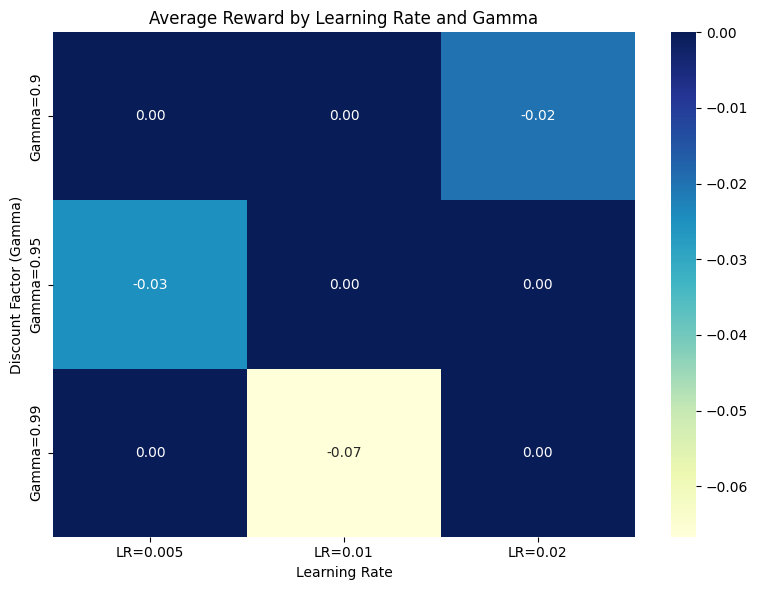

In [23]:
import seaborn as sns

# Example of reshaping outcomes for heatmap based on learning rate and gamma
learning_rates = sorted({parms['learning_rate'] for parms in parameter_sets})
gammas = sorted({parms['gamma'] for parms in parameter_sets})

# Create a 2D matrix to store average rewards for each configuration
reward_grid = np.zeros((len(gammas), len(learning_rates)))

for idx, (hidden_layers, parms) in enumerate(zip(hidden_layer_configs, parameter_sets)):
    gamma_idx = gammas.index(parms['gamma'])
    lr_idx = learning_rates.index(parms['learning_rate'])
    reward_grid[gamma_idx, lr_idx] = np.mean(all_outcomes[idx][-10:])

plt.figure(figsize=(8, 6))
sns.heatmap(reward_grid, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=[f"LR={lr}" for lr in learning_rates], 
            yticklabels=[f"Gamma={gamma}" for gamma in gammas])
plt.xlabel('Learning Rate')
plt.ylabel('Discount Factor (Gamma)')
plt.title('Average Reward by Learning Rate and Gamma')
plt.tight_layout()
plt.show()

########################################################################

Some experiments explanation is in the above, Others in the below. 

######################################################################

## Experiments I ran

Training Outcomes plot

The rewards across different configurations remain mostly flat, indicating limited improvement or variation in the reward across batches. This could suggest that the chosen parameters or the setup may not be significantly enhancing the agent’s performance, as the rewards stay low and stable across all configurations. Adjusting key parameters, such as the learning rate or increasing training epochs, might lead to better training dynamics.


Cumulative Reward plot

The steepness of the slopes varies, with some configurations (e.g., higher learning rates or specific step sizes) showing faster reward loss than others. This pattern implies that adjustments to the model parameters may be necessary to stabilize or increase cumulative rewards.

Reward Distribution Plot

Each distribution is tightly centered around a very narrow range close to zero, with minimal variance. This uniform distribution suggests that the agent's actions did not result in significant reward changes across different parameter settings, indicating limited learning or effective policy adaptation.

Final Average Reward plot

Most configurations yield negative average rewards, with some configurations performing slightly better (closer to zero) than others. The configurations with multiple hidden layers and higher learning rates generally show slightly higher average rewards, suggesting marginally improved performance. However, the overall performance remains low across all configurations, indicating limited success in achieving positive rewards in training

Average Reward Plot 

Higher Gamma values (closer to 1, e.g., 0.99) generally yield worse performance, particularly with a learning rate of 0.01, as shown by the lowest average reward of -0.07.
Lower Gamma values (e.g., 0.9 and 0.95) tend to perform better, with average rewards near 0 in several combinations.
Learning rate adjustments reveal varying sensitivity: with Gamma = 0.95, increasing LR to 0.02 leads to a reward drop to -0.03, while for Gamma = 0.99, LR = 0.005 yields close to zero reward.

#############################################################################



### Difficulties I ran into 

I spend several days even after deadline to work with Box2d, I need to install and reinstall python many times along with the other pakages of python like matplotlib, numpy etc. I had to go to the previous versions of python to work Box2D, later I had found out that Box2D is not maintained properly to keep up with the latest version of the python. I had to install another pakages of Box2D named box2d-py which seemed work properly and with the latest version. That is why the delay submission happened.  

There is no grading script for this assignment.  You will be graded by the effort you put into running your experiments and the amount of detail you provide in your descriptions.

<font color="red">Check in</font> a zip or tar file containing
- your A5 notebook
- `cartpole.py`
- `neuralnetworksA4.py`
- `optimizers.py`

# Extra Credit

During training with various parameter values, save your best `Qnet` in a file using `pickle`.  Once you have a saved a good agent, illustrate the performance of this agent by loading it from your `pickle` file and using it to control an animation of the cart-pole using the code in `cartpole_play.py` as a guide.  

When you check in your A5 solution, include the pickle file containing your best `Qnet`. Your notebook must include code at the end for loading this file, running `test` with an agent using your `Qnet`, plotting the angle during the test runs, and animating the cart-pole being controlled by your agent with your best `Qnet`.